In [4]:
import logging as lg
from pathlib import Path
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
%matplotlib inline

In [5]:
verbose=True
RESULT_DIR=Path("result")
if verbose:
    lg.getLogger().setLevel(lg.INFO)
    lg.info("Verbose mode activated")

INFO:root:Verbose mode activated


In [6]:
from tools.models import CNNClassifier,MLPClassifier

In [7]:
def reshape_mnist_mlp(x,y):
    sample_num=x.shape[0]
    x=x.reshape(sample_num, -1)
    x= x.astype('float32')
    x /= 255
    y = to_categorical(y, 10)
    return x,y

In [8]:
def reshape_mnist_cnn(x,y):
    sample_num=x.shape[0]
    x=x.reshape(sample_num, 28,28,1)
    x= x.astype('float32')
    x /= 255
    y = to_categorical(y, 10)
    return x,y

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_mlp,y_train_mlp=reshape_mnist_mlp(x_train,y_train)
x_test_mlp,y_test_mlp=reshape_mnist_mlp(x_test,y_test)
x_train_cnn,y_train_cnn=reshape_mnist_cnn(x_train,y_train)
x_test_cnn,y_test_cnn=reshape_mnist_cnn(x_test,y_test)

In [10]:
x_train_mlp.shape,x_train_cnn.shape

((60000, 784), (60000, 28, 28, 1))

In [11]:
mlp=MLPClassifier(input_dim=784,output_dim=10,result_dir=RESULT_DIR)
cnn=CNNClassifier(input_height=28,input_width=28,input_channels=1,result_dir=RESULT_DIR)

INFO:root:Not found such a trained model.
INFO:root:Creating new model...
INFO:root:Finished.
INFO:root:Not found such a trained model.
INFO:root:Creating new model...
INFO:root:Finished.


In [12]:
mlp_history=mlp.fit(x_train_mlp,y_train_mlp,epochs=10)
cnn_history=cnn.fit(x_train_cnn,y_train_cnn,epochs=10)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 3s 83us/step - loss: 0.3827 - acc: 0.8882 - val_loss: 0.3061 - val_acc: 0.9066
Epoch 2/10
42000/42000 [==============================] - 1s 19us/step - loss: 0.1532 - acc: 0.9547 - val_loss: 0.1964 - val_acc: 0.9391
Epoch 3/10
42000/42000 [==============================] - 1s 19us/step - loss: 0.1010 - acc: 0.9700 - val_loss: 0.1237 - val_acc: 0.9622
Epoch 4/10
42000/42000 [==============================] - 1s 19us/step - loss: 0.0722 - acc: 0.9780 - val_loss: 0.1018 - val_acc: 0.9682
Epoch 5/10
42000/42000 [==============================] - 1s 20us/step - loss: 0.0544 - acc: 0.9832 - val_loss: 0.1012 - val_acc: 0.9711
Epoch 6/10
42000/42000 [==============================] - 1s 19us/step - loss: 0.0405 - acc: 0.9875 - val_loss: 0.1588 - val_acc: 0.9558
Epoch 7/10
42000/42000 [==============================] - 1s 18us/step - loss: 0.0310 - acc: 0.9903 - val_loss: 0.1507 - val_acc

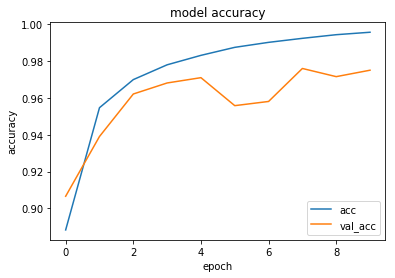

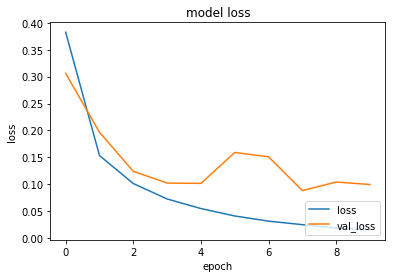

In [13]:
mlp.plot_history(epoch=10)

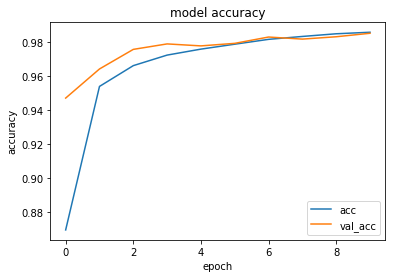

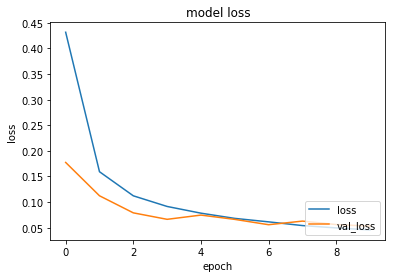

In [14]:
cnn.plot_history(epoch=10)

In [15]:
mlp.evaluate(x_test_mlp,y_test_mlp)

10000/10000 [==============================] - 0s 39us/step


{'loss': 0.08526172306997469, 'acc': 0.9764}

In [16]:
cnn.evaluate(x_test_cnn,y_test_cnn)

10000/10000 [==============================] - 1s 58us/step


{'loss': 0.04251139278629707, 'acc': 0.9865}